# Proyecto 2 : Análisis de señales ECG
### Bioseñales
Laura Vargas - Isabela Trujillo

 #### Diagrama de flujo de las metodologías usadas
1. Artículo 1. (_Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias_)
%poner en nuestras palabras xd
2. Artículo 2 (_Optimal Multi-Stage Arrhythmia Classification Approach_)
3. Artículo 3 (_An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection_)    

    
    PDF Anexo

#### Extracción de registros correspondiente a bradicardia sinusal  (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation).

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
#!pip install openpyxl
drive.mount('/content/drive') #force_remount=True
directorio_actual=os.getcwd()
print(directorio_actual)

#archivos=os.listdir(directorio_actual+"/ECGDataDenoised.zip")


df = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Biosenales/Proyecto_2/Diagnostics.xlsx')
# Muestra las primeras filas del DataFrame
print(df.head())


Mounted at /content/drive
/content
                     FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        

In [2]:

AFIB=df[df['Rhythm'] == 'AFIB' ] #Encontrar los nombres de los archivos que corresponden a  la enfermedad Atrial Fibrillation (AFIB)
SB=df[df['Rhythm'] == 'SB' ]  #Encontrar los nombres de los archivos que corresponden a  la enfermedad Sinus Bradycardia (SB)
print(AFIB)
print(SB)
nombres_AFIB=AFIB['FileName'].tolist() # Forma una lista con lo que esta en FileName del AFIB
nombres_SB=SB['FileName'].tolist()

                        FileName Rhythm          Beat  PatientAge  Gender  \
0     MUSE_20180113_171327_27000   AFIB      RBBB TWC          85    MALE   
6     MUSE_20180114_075026_69000   AFIB           TWC          80  FEMALE   
15    MUSE_20180113_133901_16000   AFIB          STTC          67  FEMALE   
22    MUSE_20180116_123940_90000   AFIB           TWC          81    MALE   
29    MUSE_20180114_075003_61000   AFIB       TWC VPB          81    MALE   
...                          ...    ...           ...         ...     ...   
9882  MUSE_20180116_120939_86000   AFIB          LVHV          77  FEMALE   
9884  MUSE_20180114_134126_54000   AFIB       CCR TWC          70  FEMALE   
9889  MUSE_20180115_131040_20000   AFIB           TWC          81  FEMALE   
9896  MUSE_20180116_170450_55000   AFIB  LVQRSLL RBBB          74    MALE   
9903  MUSE_20180115_131524_93000   AFIB      RBBB TWC          70    MALE   

      VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  \


In [3]:
#drive.mount('/content/drive')
!cp /content/drive/MyDrive/ColabNotebooks/Biosenales/Proyecto_2/ECGDataDenoised.zip .
!unzip ECGDataDenoised.zip
directorio_actual=os.getcwd()


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ECGDataDenoised/MUSE_20180112_133500_45000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133502_57000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133517_13000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133520_30000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133525_62000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133534_74000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133541_12000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133542_15000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133558_67000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133642_18000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133714_40000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133734_35000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133738_64000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133746_02000.csv  
  inflating: ECGDataDenoised/MUSE_20180112_133802_49000.csv  
  inflati

In [4]:
archivos=os.listdir(directorio_actual+"/ECGDataDenoised")
print(archivos)

['MUSE_20180120_121001_43000.csv', 'MUSE_20180116_131029_02000.csv', 'MUSE_20180116_175255_75000.csv', 'MUSE_20180113_073756_28000.csv', 'MUSE_20180113_183723_26000.csv', 'MUSE_20180113_134942_37000.csv', 'MUSE_20180116_125842_09000.csv', 'MUSE_20180114_120114_84000.csv', 'MUSE_20180112_122717_13000.csv', 'MUSE_20180118_170508_87000.csv', 'MUSE_20180113_122318_73000.csv', 'MUSE_20180113_172714_60000.csv', 'MUSE_20180118_173613_78000.csv', 'MUSE_20180119_170145_80000.csv', 'MUSE_20180116_130925_73000.csv', 'MUSE_20180112_165018_93000.csv', 'MUSE_20180112_133525_62000.csv', 'MUSE_20180116_133517_43000.csv', 'MUSE_20180112_134825_56000.csv', 'MUSE_20180114_070940_66000.csv', 'MUSE_20180114_071043_95000.csv', 'MUSE_20180113_135249_45000.csv', 'MUSE_20180115_133326_40000.csv', 'MUSE_20180112_122519_94000.csv', 'MUSE_20180119_175556_08000.csv', 'MUSE_20180113_122839_27000.csv', 'MUSE_20180118_173300_98000.csv', 'MUSE_20180114_122018_54000.csv', 'MUSE_20180114_074408_60000.csv', 'MUSE_2018011

In [5]:
derivacion_AFIB=[]
derivacion_SB=[]

for i in archivos:
  if i[:-4] in nombres_AFIB:
    datos = pd.read_csv(directorio_actual+"/ECGDataDenoised/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    derivacion_AFIB.append(datos['II'])
  if i[:-4] in nombres_SB:
    datos = pd.read_csv(directorio_actual+"/ECGDataDenoised/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    derivacion_SB.append(datos['II'])


In [6]:
print(f' tamaño AFIB: {len(derivacion_AFIB)}\n tamaño SB {len(derivacion_SB)}')
derivacion_AFIB=np.array(derivacion_AFIB)
derivacion_SB=np.array(pd.DataFrame(derivacion_SB))
print(np.shape(derivacion_AFIB))
print(np.shape(derivacion_SB))

 tamaño AFIB: 1780
 tamaño SB 3889
(1780, 5000)
(3889, 5000)


In [ ]:
"""#Señal prueba
datos_AFIB=derivacion_AFIB[:4,:]
datos_SB=derivacion_SB[:4,:]"""

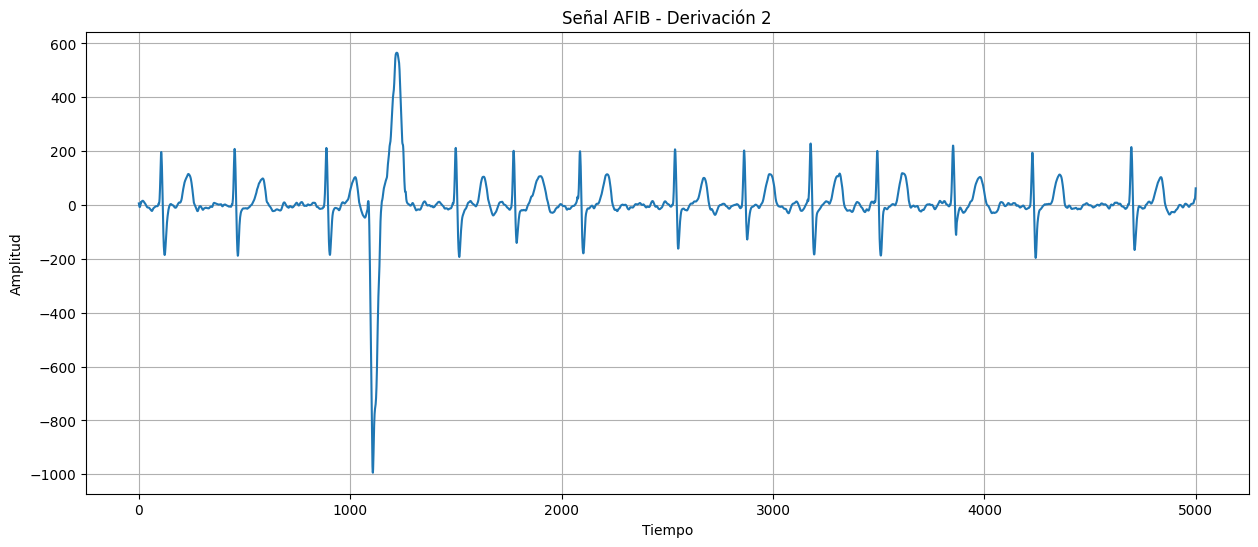

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(derivacion_AFIB[0]) #Prueba
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal AFIB - Derivación 2')
plt.grid(True)

**Programación fórmulas:**
#### *Detrending*
1. 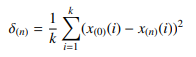


* Corresponde al detrend. En este caso se utiliza la libreria scipy, esta contiene la función detrend que se aplica a la derivación 2 de cada enfermedad


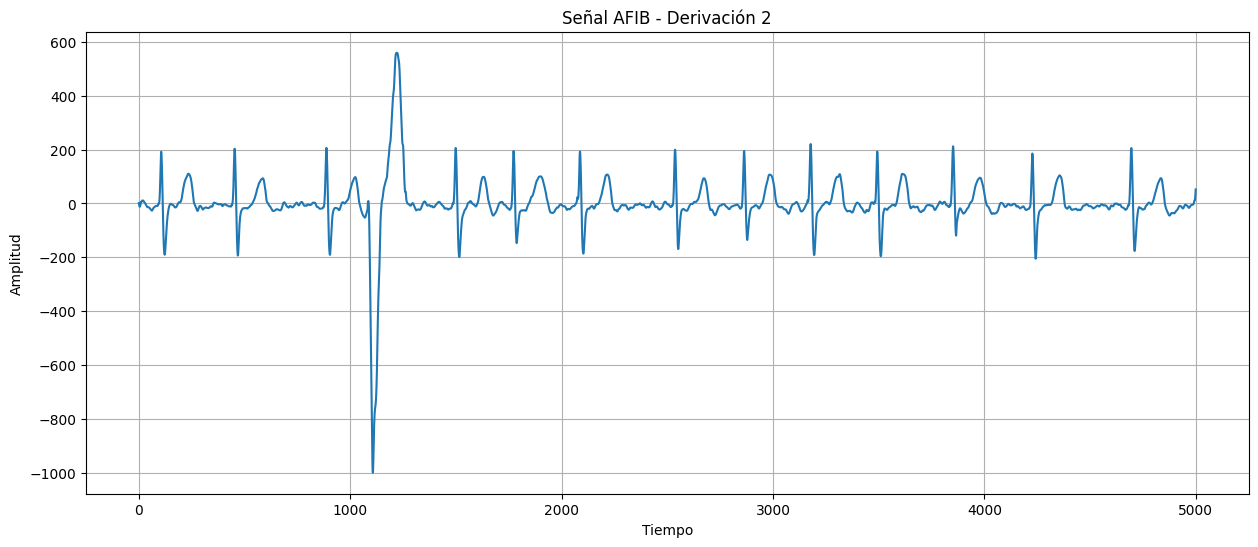

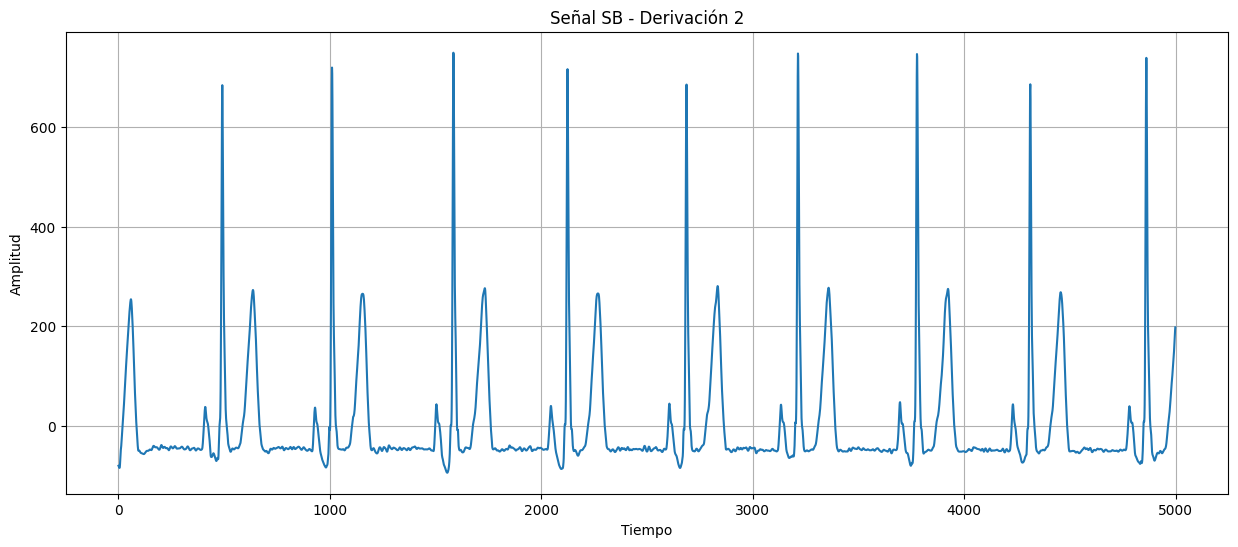

In [9]:
from ast import Pass
import scipy.signal as signal

detrend_AFIB=[]
for i in derivacion_AFIB:
  A=signal.detrend(i)
  detrend_AFIB.append(A)

plt.figure(figsize=(15, 6))
plt.plot(detrend_AFIB[0]) #Prueba
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal AFIB - Derivación 2')
plt.grid(True)

detrend_AFIB=np.array(detrend_AFIB)

detrend_SB=[]
derivacion_SB= np.nan_to_num(derivacion_SB, nan=0.0)
for i in derivacion_SB:
      S=signal.detrend(i)
      detrend_SB.append(S)

detrend_SB=np.array(detrend_SB)

plt.figure(figsize=(15, 6))
plt.plot(detrend_SB[0])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal SB - Derivación 2')
plt.grid(True)

In [ ]:
print(np.shape(detrend_AFIB))
print(np.shape(detrend_SB))

(1780, 5000)
(3889, 5000)


#### *Compression*
2. 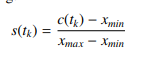


 tamaño AFIB: (1780, 5000)
 tamaño SB: (3889, 5000)


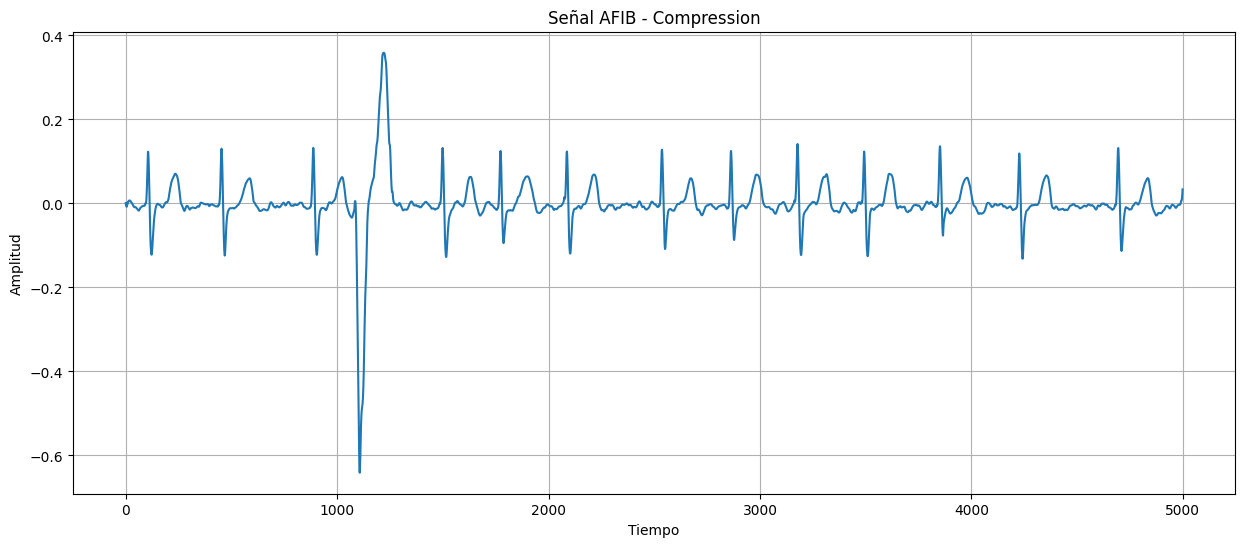

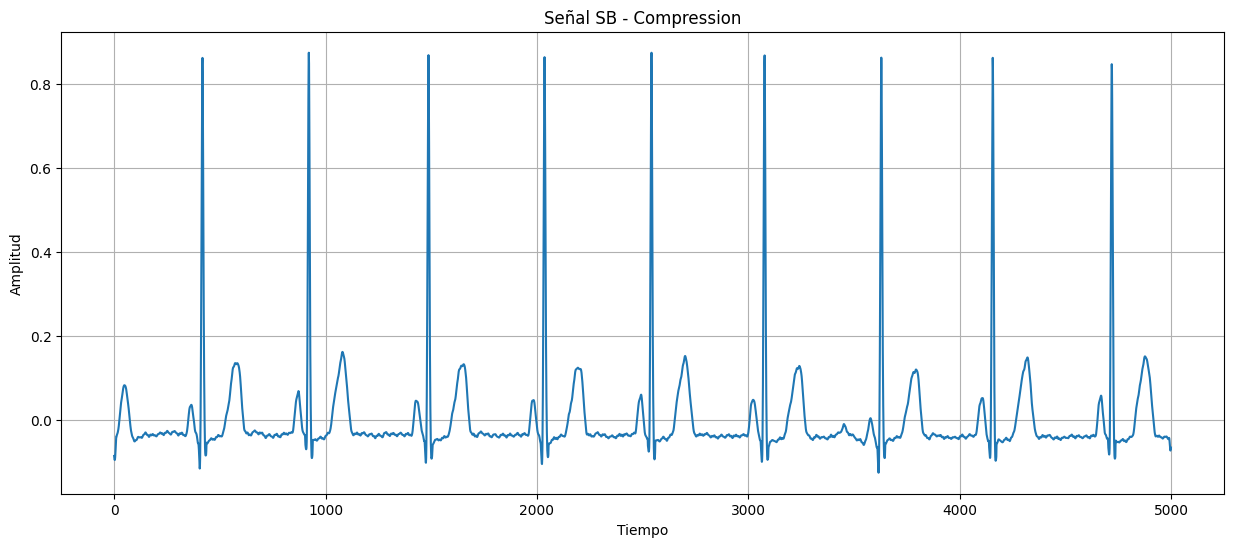

In [11]:
from operator import length_hint
# AFIB
compresion_AFIB=np.zeros((1780,5000))
fila=0
for item in detrend_AFIB:
    x_max_AFIB=max(item)
    x_min_AFIB=min(item)
    for i,valor in enumerate(item):
      comp=(valor-x_min_AFIB)/(x_max_AFIB-x_min_AFIB)
      compresion_AFIB[fila, i] = comp
    fila+=1
fila2=0
for i in compresion_AFIB:
  det2=signal.detrend(i) #Como la señal se desfasa para dejarla en el rango de 0 y 1 se vuelve a aplicar detrend para que quede centrada en 0.
  compresion_AFIB[fila2]=det2
  fila2+=1

plt.figure(figsize=(15, 6))
plt.plot(compresion_AFIB[0])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal AFIB - Compression')
plt.grid(True)


#SB
compresion_SB=np.zeros((3889,5000))
fila=0
for item in detrend_SB:
    x_max_SB=max(item)
    x_min_SB=min(item)
    for i,valor in enumerate(item):
      comp=(valor-x_min_SB)/(x_max_SB-x_min_SB)
      compresion_SB[fila, i] = comp
    fila+=1
fila2=0
for i in compresion_SB:
  det2=signal.detrend(i) #Como la señal se desfasa para dejarla en el rango de 0 y 1 se vuelve a aplicar detrend para que quede centrada en 0.
  compresion_SB[fila2]=det2
  fila2+=1
plt.figure(figsize=(15, 6))
plt.plot(compresion_SB[0])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal SB - Compression')
plt.grid(True)
print(f' tamaño AFIB: {np.shape(compresion_AFIB)}\n tamaño SB: {np.shape(compresion_SB)}')

#### *Higher Order Spectral Analysis*
##### *BISPECTRUM*
3. 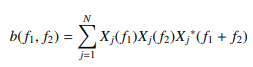


*   Se necesita calcular primero el *Power Spectral Analysis* -



<ipython-input-13-488d2c2ba717>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  transform_AFIB[fila] = power_AFIB


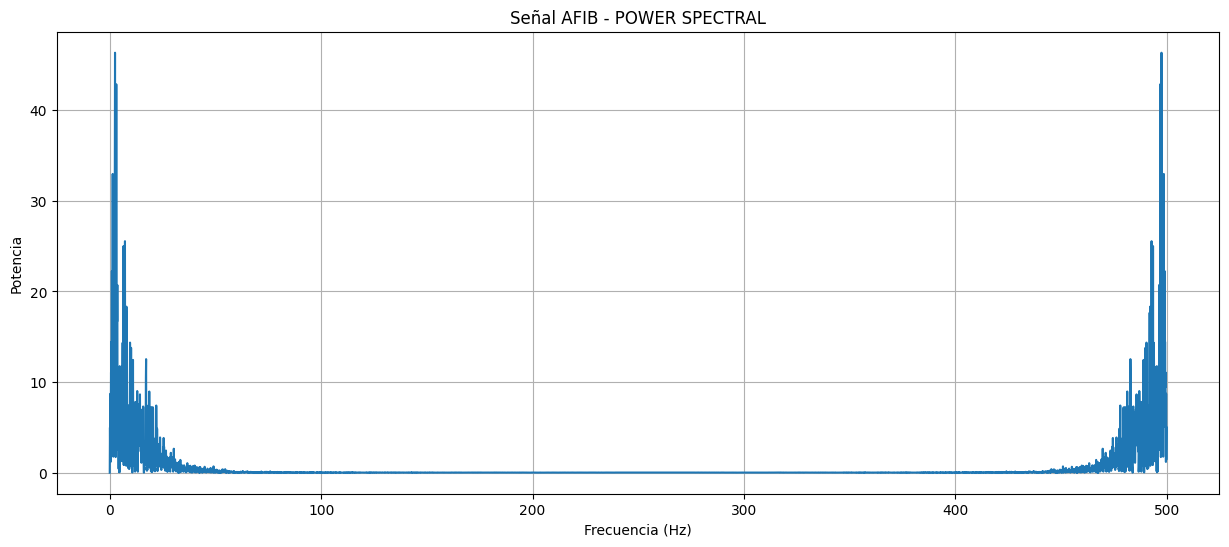

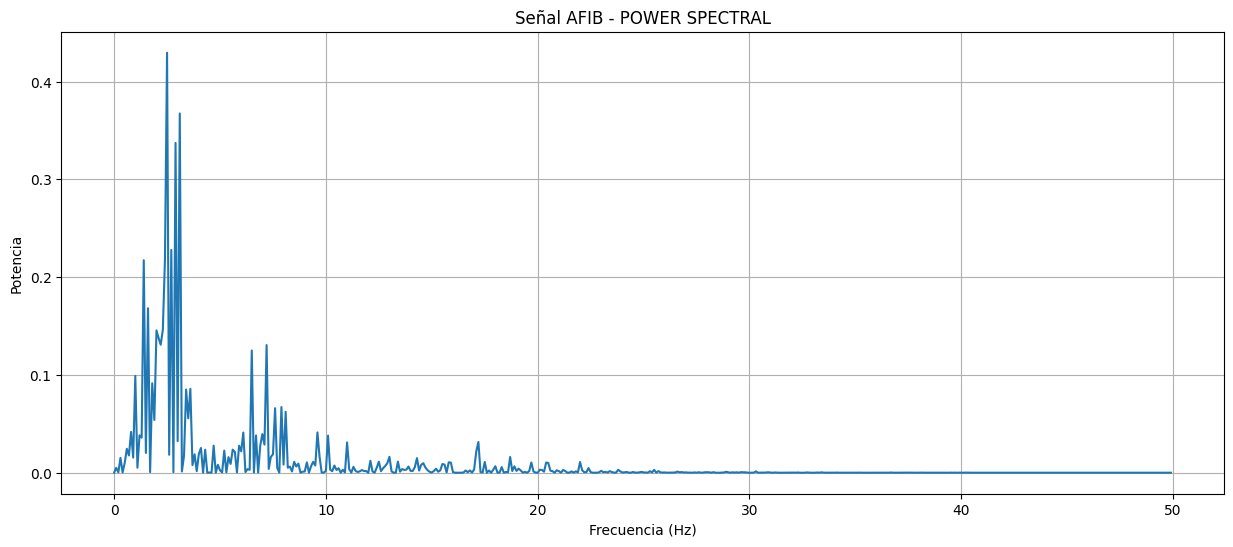

In [13]:
# POWER SPECTRAL

#AFIB
transform_AFIB=np.zeros((1780,5000)) #---------- cambiar el tamaño -----------
fila=0
for i in compresion_AFIB:
  power_AFIB=np.fft.fft(i)
  transform_AFIB[fila] = power_AFIB
  fila+=1

Fs=500  #500 Hz sampling rate dice de donde viene la base de datos
N=len(transform_AFIB[0])
F_AFIB = np.arange(0,N)*Fs/N

plt.figure(figsize=(15, 6))
plt.plot(F_AFIB,np.abs(transform_AFIB[0]))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Señal AFIB - POWER SPECTRAL')
plt.grid(True)

mirar_freq_AFIB=transform_AFIB[0][:500]
plt.figure(figsize=(15, 6))
plt.plot(F_AFIB[:500],np.power(np.abs(mirar_freq_AFIB),2)/N)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Señal AFIB - POWER SPECTRAL')
plt.grid(True)

<ipython-input-14-19596205acbe>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  transform_SB[fila] = power_SB


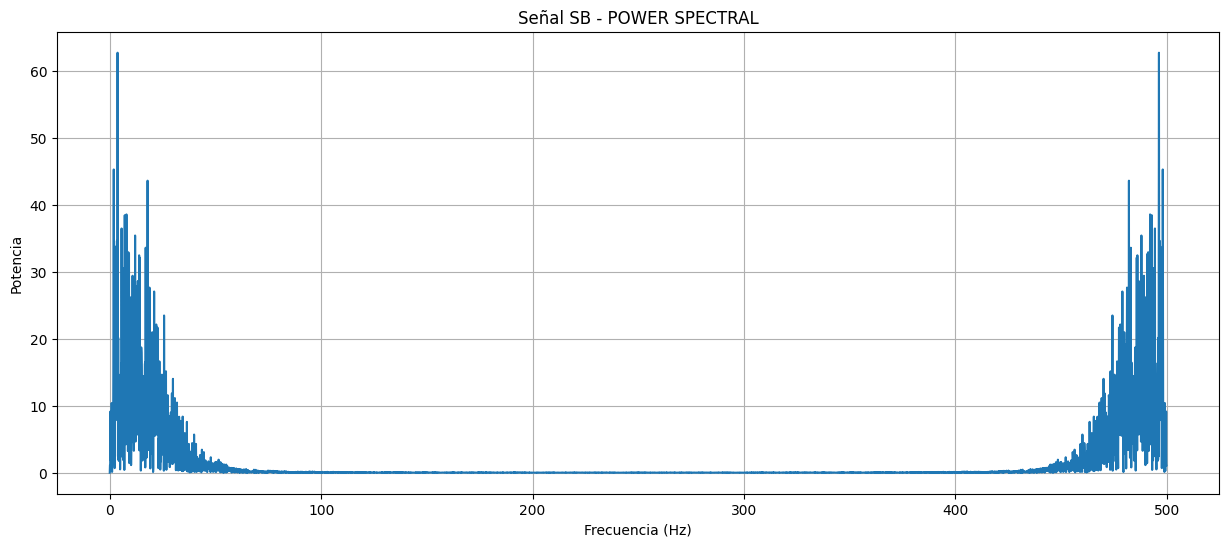

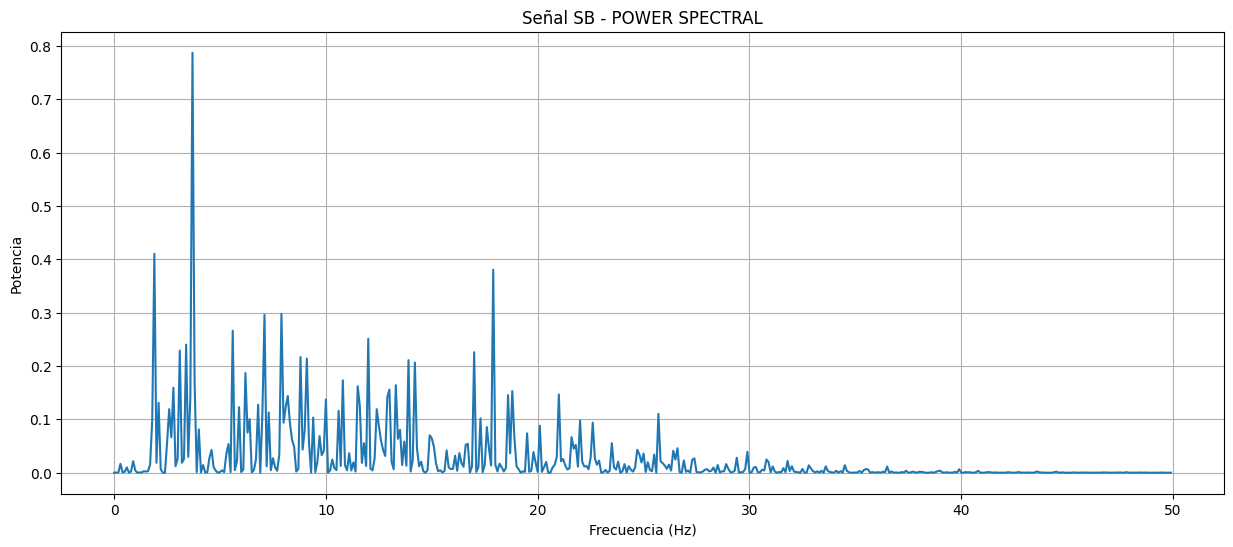

In [14]:

#SB
transform_SB=np.zeros((3889,5000)) #---------- cambiar el tamaño -----------
fila=0
for i in compresion_SB:
  power_SB=np.fft.fft(i)
  transform_SB[fila] = power_SB
  fila+=1

N=len(transform_SB[0])
F_SB = np.arange(0,N)*Fs/N

plt.figure(figsize=(15, 6))
plt.plot(F_SB,np.abs(transform_SB[0]))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Señal SB - POWER SPECTRAL')
plt.grid(True)

mirar_freq_SB=transform_SB[0][:500]
plt.figure(figsize=(15, 6))
plt.plot(F_SB[:500],np.power(np.abs(mirar_freq_SB),2)/N)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Señal SB - POWER SPECTRAL')
plt.grid(True)


#### ***Hallando Bispectrum***
##### FREQ de 0-15 Hz


*   Para AFIB




In [15]:
bispectrum_AFIB=np.zeros((1780,60,60))
f1_AFIB=np.zeros((1780,60))
f2_AFIB=np.zeros((1780,60))
f_conj_AFIB=np.zeros((1780,60))
fila = 0
for fila in range(transform_AFIB.shape[0]):  # Iterar sobre las filas (para cada señal)
    f1_AFIB[fila] = (transform_AFIB[fila][:60])  # Obtener los primeros 60 elementos
    f2_AFIB[fila] = transform_AFIB[fila][90:90+60]  # Obtener los elementos de 90 a 150
    f_conj_AFIB[fila] = np.conjugate(f1_AFIB[fila] + f2_AFIB[fila])  # Calcular el conjugado

    # Cálculo del bispectro
    for i in range(60):  # Iterar sobre las frecuencias
        for j in range(60):  # Iterar sobre las frecuencias
            if i + j < 60:  # Asegurarse de no salir del rango
                bispectrum_AFIB[fila, i, j] = (f1_AFIB[fila, i] * f2_AFIB[fila, j] * f_conj_AFIB[fila, i + j])/100



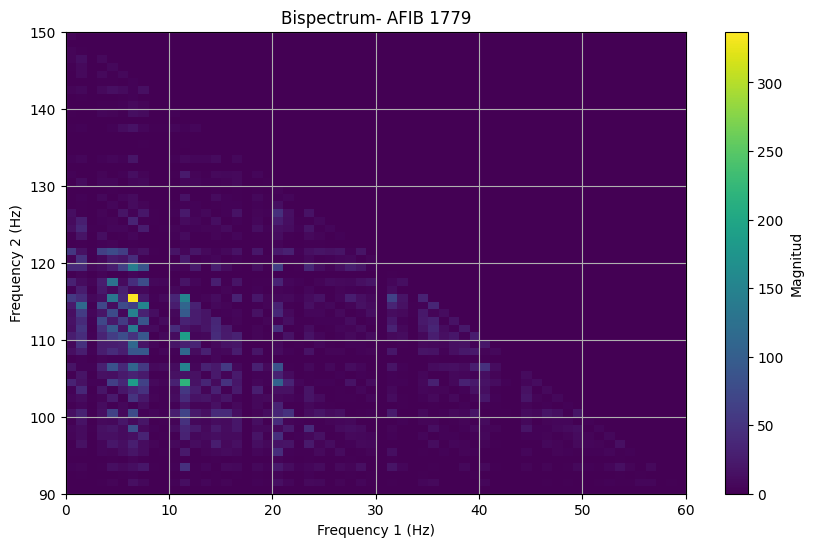

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(bispectrum_AFIB[0]), extent=[0, 60, 90, 150], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitud')
plt.title(f'Bispectrum- AFIB {fila}')
plt.xlabel('Frequency 1 (Hz)')
plt.ylabel('Frequency 2 (Hz)')
plt.grid()
plt.show()



*   Para SB



In [17]:
bispectrum_SB=np.zeros((3889,60,60))
f1_SB=np.zeros((3889,60))
f2_SB=np.zeros((3889,60))
f_conj_SB=np.zeros((3889,60))
fila = 0
for fila in range(transform_SB.shape[0]):  # Iterar sobre las filas (para cada señal)
    f1_SB[fila] = transform_SB[fila][:60]  # Obtener los primeros 60 elementos
    f2_SB[fila] = transform_SB[fila][90:90+60]  # Obtener los elementos de 90 a 150
    f_conj_SB[fila] = np.conjugate(f1_SB[fila] + f2_SB[fila])  # Calcular el conjugado

    # Cálculo del bispectro
    for i in range(60):  # Iterar sobre las frecuencias
        for j in range(60):  # Iterar sobre las frecuencias
            if i + j < 60:  # Asegurarse de no salir del rango
                bispectrum_SB[fila, i, j] = (f1_SB[fila, i] * f2_SB[fila, j] * f_conj_SB[fila, i + j])/100


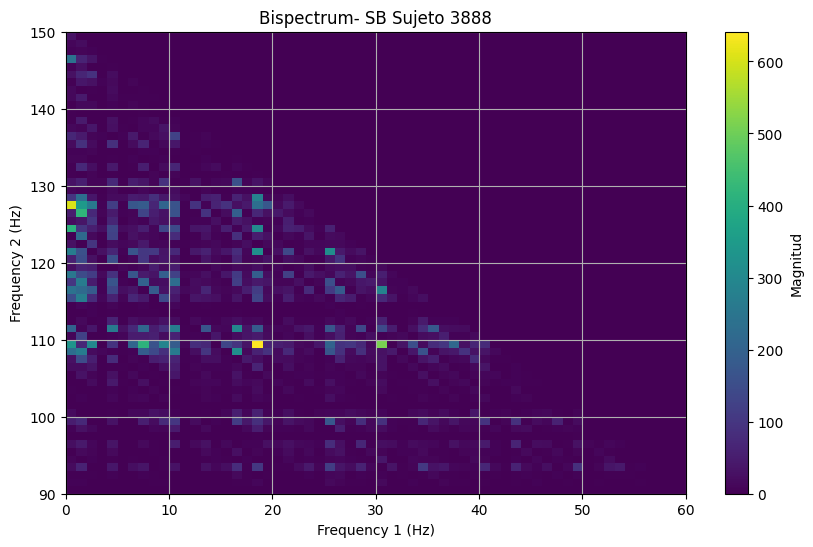

In [18]:
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(bispectrum_SB[0]), extent=[0, 60, 90, 150], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitud')
plt.title(f'Bispectrum- SB Sujeto {fila}')
plt.xlabel('Frequency 1 (Hz)')
plt.ylabel('Frequency 2 (Hz)')
plt.grid()
plt.show()

#### *Bicoherence*
4.  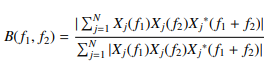

In [19]:
bicoherence_AFIB=np.zeros((1780,60,60))

bispectrum_magnitud_AFIB=np.zeros((1780,60,60))
den=np.zeros((1780,60))
for i in range(1780):
    # Calcular la magnitud del bispectro
    bispectrum_magnitud_AFIB[i] = np.abs(bispectrum_AFIB[i])
    for j in range(60):
        for k in range(60):
            den[i, j] = np.abs(transform_AFIB[i][j]) * np.abs(transform_AFIB[i][k])  # Producto de las potencias espectrales

    for j in range(60):
        bicoherence_AFIB[i, j] = bispectrum_magnitud_AFIB[i, j] / den[i, j]


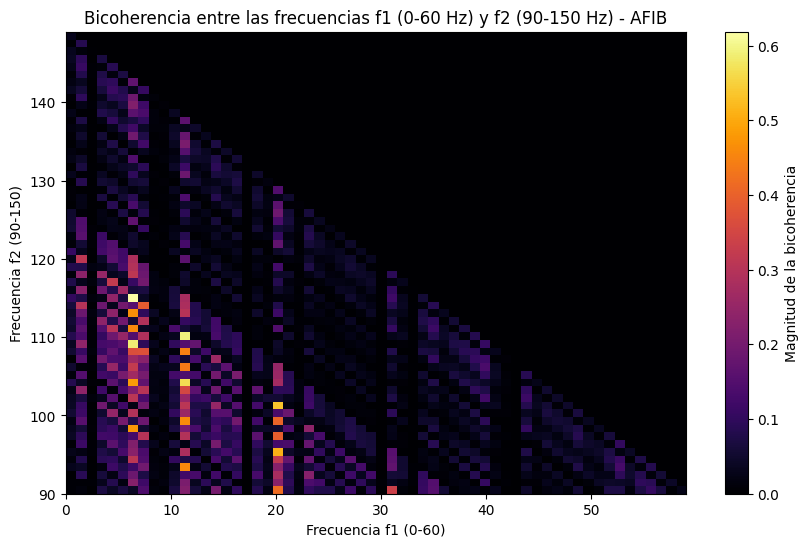

In [20]:
f1 = np.arange(0, 60)  # Frecuencias de 0 a 60 para f1
f2 = np.arange(90, 150)  # Frecuencias de 90 a 150 para f2

plt.figure(figsize=(10, 6))
plt.imshow(bicoherence_AFIB[0], aspect='auto', extent=[f1.min(), f1.max(), f2.min(), f2.max()], origin='lower', cmap='inferno')
plt.title('Bicoherencia entre las frecuencias f1 (0-60 Hz) y f2 (90-150 Hz) - AFIB')
plt.xlabel('Frecuencia f1 (0-60)')
plt.ylabel('Frecuencia f2 (90-150)')
plt.colorbar(label='Magnitud de la bicoherencia')
plt.show()

In [21]:
bicoherence_SB=np.zeros((3889,60,60))

bispectrum_magnitud_SB=np.zeros((3889,60,60))
den_SB=np.zeros((3889,60))
for i in range(3889):
    # Calcular la magnitud del bispectro
    bispectrum_magnitud_SB[i] = np.abs(bispectrum_SB[i])
    for j in range(60):
        for k in range(60):
            den_SB[i, j] = np.abs(transform_SB[i][j]) * np.abs(transform_SB[i][k])  # Producto de las potencias espectrales

    for j in range(60):
        bicoherence_SB[i, j] = bispectrum_magnitud_SB[i, j] / den_SB[i, j]

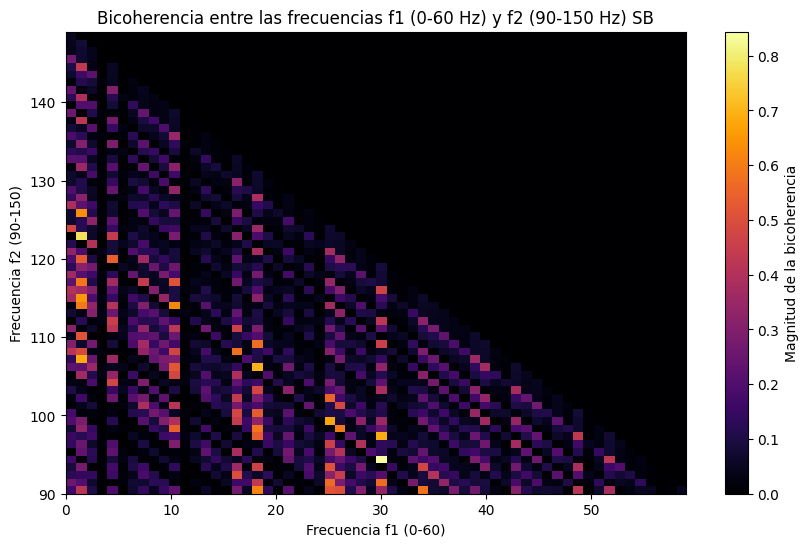

In [22]:
f1 = np.arange(0, 60)  # Frecuencias de 0 a 60 para f1
f2 = np.arange(90, 150)  # Frecuencias de 90 a 150 para f2

plt.figure(figsize=(10, 6))
plt.imshow(bicoherence_SB[0], aspect='auto', extent=[f1.min(), f1.max(), f2.min(), f2.max()], origin='lower', cmap='inferno')
plt.title('Bicoherencia entre las frecuencias f1 (0-60 Hz) y f2 (90-150 Hz) SB')
plt.xlabel('Frecuencia f1 (0-60)')
plt.ylabel('Frecuencia f2 (90-150)')
plt.colorbar(label='Magnitud de la bicoherencia')
plt.show()

Consultar qué significado y utilidad del biespectro    

    PDF Anexo

#### Extracción de la frecuencia que contiene la máxima potencia y graficarla.

In [23]:
max_potencia_AFIB = np.zeros(1780, dtype=int)
frecuencia_AFIB = np.zeros(1780)

for i in range(1780):
  max_potencia_AFIB[i] = np.argmax(np.abs(transform_AFIB[i][:500]))
  frecuencia_AFIB[i] = F_AFIB[:500][max_potencia_AFIB[i]]

tablita_frec_AFIB=pd.DataFrame(frecuencia_AFIB)
print(pd.DataFrame(frecuencia_AFIB))

        0
0     2.5
1     4.0
2     9.3
3     5.1
4     1.3
...   ...
1775  3.3
1776  9.0
1777  9.6
1778  1.1
1779  6.0

[1780 rows x 1 columns]


In [24]:
max_potencia_SB = np.zeros(3889, dtype=int)
frecuencia_SB = np.zeros(3889)

for i in range(3889):
  max_potencia_SB[i] = np.argmax(np.abs(transform_SB[i][:500]))
  frecuencia_SB[i] = F_SB[:500][max_potencia_SB[i]]

tablita_frec_SB=pd.DataFrame(frecuencia_SB)
print(pd.DataFrame(frecuencia_SB))

        0
0     3.7
1     0.9
2     3.9
3     1.0
4     9.5
...   ...
3884  3.5
3885  3.9
3886  0.9
3887  1.0
3888  6.8

[3889 rows x 1 columns]


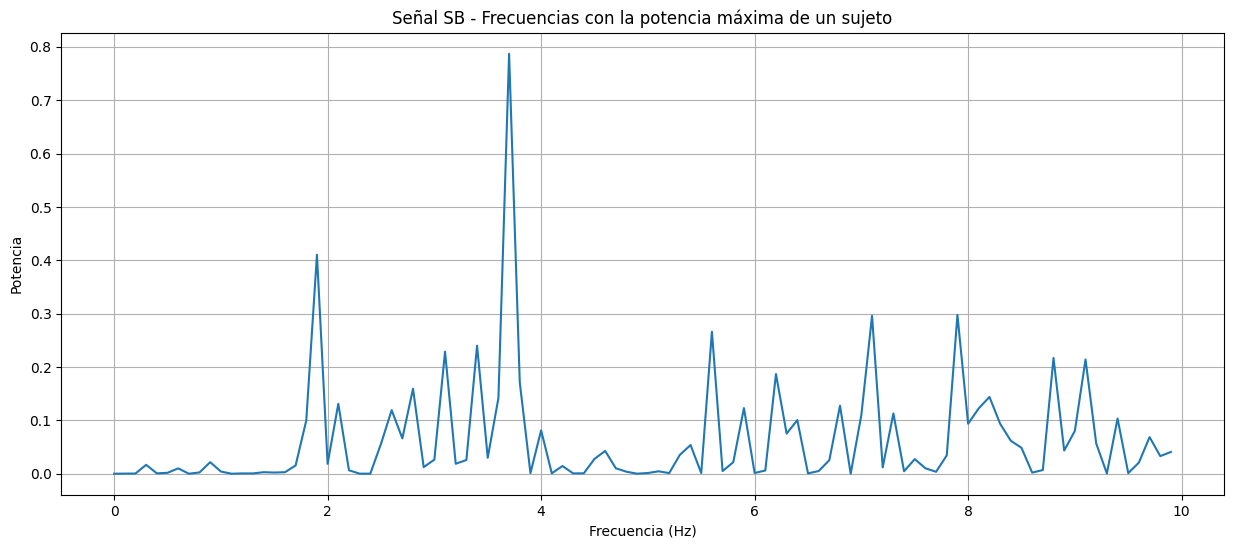

In [25]:
#Graficacion de uno de los sujetos
mirar_freq_SB=transform_SB[0][:100]
plt.figure(figsize=(15, 6))
plt.plot(F_SB[:100],np.power(np.abs(mirar_freq_SB),2)/N)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Señal SB - Frecuencias con la potencia máxima de un sujeto')
plt.grid(True)

#### Para cada señal sumar el número de frecuencias que son significativas para bicoherencia
(cuales tienen un valor superior a)
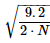

In [26]:
minimo_valor = np.sqrt(9.2/(2*60))
#AFIB
sumatoria_AFIB = np.zeros((1780,1))
for i in range(1780):
  sumatoria_AFIB[i] = np.sum(bicoherence_AFIB[i]>minimo_valor)

tablita_sum_AFIB=pd.DataFrame(sumatoria_AFIB)
print(pd.DataFrame(sumatoria_AFIB))

           0
0       44.0
1     1468.0
2      583.0
3      381.0
4      227.0
...      ...
1775   522.0
1776   489.0
1777  1267.0
1778   333.0
1779  1497.0

[1780 rows x 1 columns]


In [27]:
#SB
sumatoria_SB=np.zeros((3889,1))
for i in range(3889):
  sumatoria_SB[i]=np.sum(bicoherence_SB[i]>minimo_valor)

tablita_sum_SB=pd.DataFrame(sumatoria_SB)
print(pd.DataFrame(sumatoria_SB))


           0
0      164.0
1      901.0
2      958.0
3       24.0
4     1080.0
...      ...
3884   484.0
3885   145.0
3886   739.0
3887   157.0
3888  1025.0

[3889 rows x 1 columns]


#### Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda ver registro, tipo de patología y el frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB):

In [28]:

tablita_nombres_AFIB=pd.DataFrame(nombres_AFIB)
tablita_nombres_SB=pd.DataFrame(nombres_SB)

#AFIB

df_concat_AFIB = pd.concat([tablita_nombres_AFIB[:]], axis=1)
df_concat_AFIB['Patología'] = 'AFIB'
df_concat_AFIB['fMP'] = tablita_frec_AFIB
df_concat_AFIB['sFSB'] = tablita_sum_AFIB

df_concat_AFIB.columns = ['Registro','Patología','fMP', 'sFSB']

print(df_concat_AFIB)

#SB
df_concat_SB = pd.concat([tablita_nombres_SB[:]], axis=1)
df_concat_SB['Patología'] = 'SB'
df_concat_SB['fMP'] = tablita_frec_SB
df_concat_SB['sFSB'] = tablita_sum_SB

df_concat_SB.columns = ['Registro','Patología','fMP', 'sFSB']

print('\n',df_concat_SB)

#Se creó una copia de los datos en un excel datos_procesados.xlsx en sample data


                        Registro Patología  fMP    sFSB
0     MUSE_20180113_171327_27000      AFIB  2.5    44.0
1     MUSE_20180114_075026_69000      AFIB  4.0  1468.0
2     MUSE_20180113_133901_16000      AFIB  9.3   583.0
3     MUSE_20180116_123940_90000      AFIB  5.1   381.0
4     MUSE_20180114_075003_61000      AFIB  1.3   227.0
...                          ...       ...  ...     ...
1775  MUSE_20180116_120939_86000      AFIB  3.3   522.0
1776  MUSE_20180114_134126_54000      AFIB  9.0   489.0
1777  MUSE_20180115_131040_20000      AFIB  9.6  1267.0
1778  MUSE_20180116_170450_55000      AFIB  1.1   333.0
1779  MUSE_20180115_131524_93000      AFIB  6.0  1497.0

[1780 rows x 4 columns]

                         Registro Patología  fMP    sFSB
0     MUSE_20180112_073319_29000        SB  3.7   164.0
1     MUSE_20180113_121940_44000        SB  0.9   901.0
2     MUSE_20180112_120347_79000        SB  3.9   958.0
3     MUSE_20180114_075128_92000        SB  1.0    24.0
4     MUSE_20180118_1

#### Para las señales de análisis del punto 2 aplicar las rutinas del punto 3 al 5 y hacer un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva


In [29]:
df_AFIB = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Biosenales/Proyecto_2/datos_procesados.xlsx',sheet_name='Datos_AFIB')
print(np.shape(df_AFIB))
fMP_AFIB=df_AFIB['fMP']
sFSB_AFIB=df_AFIB['sFSB']

df_SB = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Biosenales/Proyecto_2/datos_procesados.xlsx',sheet_name='Datos_SB')
print(np.shape(df_SB))
fMP_SB=df_SB['fMP']
sFSB_SB=df_SB['sFSB']

(1780, 5)
(3889, 5)


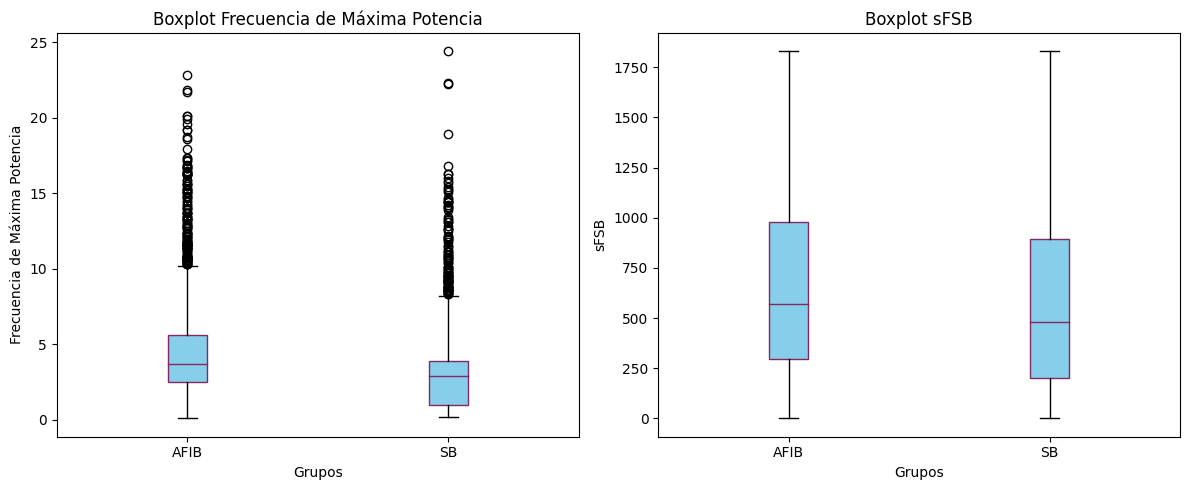

In [30]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para 'fMP'
data_fMP = [fMP_AFIB[:], fMP_SB[:]]
axs[0].boxplot(data_fMP,boxprops=dict(facecolor='skyblue', edgecolor='#832962'), medianprops=dict(color='#832962'),patch_artist=True)
axs[0].set_title('Boxplot Frecuencia de Máxima Potencia')
axs[0].set_xlabel('Grupos')
axs[0].set_ylabel('Frecuencia de Máxima Potencia')
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['AFIB', 'SB'])

# Boxplot para 'sFSB'
data_sFSB = [sFSB_AFIB[:], sFSB_SB[:]]
axs[1].boxplot(data_sFSB,boxprops=dict(facecolor='skyblue', edgecolor='#832962'), medianprops=dict(color='#832962'),patch_artist=True)
axs[1].set_title('Boxplot sFSB')
axs[1].set_xlabel('Grupos')
axs[1].set_ylabel('sFSB')
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['AFIB', 'SB'])
plt.tight_layout()

plt.show()

#### Análisis cajas y bigotes

    PDF Anexo

#### Indicar si hay o no diferencias estadísticas entre las características espectrales del punto 4 y 5 para las dos poblaciones de estudio

### **Comprobando supuestos:**

*   **Normalidad**

H0: El grupo tiene una distribución normal

H1: El grupo no tiene distribución normal

*Aclaración:* debido a la cantidad de datos que se toma (n>50) se realizó prueba Kolmogorov Smirnov, sin embargo, esta prueba arroja valores de p=0 para todos los grupos de datos, al hacer la prueba de Shapiro sí da valores de p diferentes a 0, por esta razón se deja en el dataframe los resultados de esta última.
*   **Homocedasticidad**

H0: Los grupos tienen varianzas iguales

H1: Los grupos tienen varianzas diferentes
*   **Independencia**

Se asume independencia de los grupos

In [31]:
import scipy.stats as sis

kf_A, pf_A = sis.kstest(fMP_AFIB,'norm')
kf_S, pf_S = sis.kstest(fMP_SB,'norm')
ks_A, ps_A = sis.kstest(sFSB_AFIB,'norm')
ks_S, ps_S = sis.kstest(sFSB_SB,'norm')

kolmo=pd.DataFrame(np.array([pf_A,pf_S,ps_A,ps_S]))
filas=pd.DataFrame(np.array(['fMP AFIB','fMP SB','sFSB AFIB','sFSB SB']))
e = pd.concat([filas,kolmo], axis=1)
e.columns = ['Datos',' Valor p - Kolmogorov']
print(f'\n {e} ')


        Datos   Valor p - Kolmogorov
0   fMP AFIB                    0.0
1     fMP SB                    0.0
2  sFSB AFIB                    0.0
3    sFSB SB                    0.0 


In [32]:
#Identificando normalidad
shapirof_A, pf_A = sis.shapiro(fMP_AFIB)
shapirof_S, pf_S = sis.shapiro(fMP_SB)
shapiros_A, ps_A = sis.shapiro(sFSB_AFIB)
shapiros_S, ps_S = sis.shapiro(sFSB_SB)

shapiro=pd.DataFrame(np.array([pf_A,pf_S,ps_A,ps_S]))
filas=pd.DataFrame(np.array(['fMP AFIB','fMP SB','sFSB AFIB','sFSB SB']))
estadistica = pd.concat([filas,shapiro], axis=1)
estadistica.columns = ['Datos',' Valor p - Shapiro']

#levene - homocedasticidad
homoces_fMP, p_fMP = sis.levene(fMP_AFIB,fMP_SB)
homoces_sFSB, p_sFSB = sis.levene(sFSB_AFIB,sFSB_SB)

h=pd.DataFrame(np.array([p_fMP,p_sFSB]))
rows=pd.DataFrame(np.array(['fMP AFIB - fMP SB','sFSB AFIB - sFSB SB']))
lev = pd.concat([rows,h], axis=1)
lev.columns = ['Datos',' Valor p - Lèvene']
print(f'\n {estadistica} \n \n {lev}')


        Datos   Valor p - Shapiro
0   fMP AFIB        1.406909e-40
1     fMP SB        2.714174e-53
2  sFSB AFIB        7.423398e-26
3    sFSB SB        1.116342e-40 
 
                  Datos   Valor p - Lèvene
0    fMP AFIB - fMP SB       2.520723e-30
1  sFSB AFIB - sFSB SB       4.175337e-01


Para la prueba de normalidad se niega H0, por lo tanto no se puede decir que vienen de una distribución normal. Tanto para Kolmogorov como Shapiro

Igualmente,se niega H0 en homocedasticidad, se puede decir que los grupos no tienen varianzas iguales.

Entonces se realiza prueba no paramétrica.

**Prueba no paramétrica - U Mann Whitney**

*   H0: No hay diferencia (en términos de tendencia central) entre los dos grupos de la población.
*   H1: Existe una diferencia (con respecto a la tendencia central) entre los dos grupos de la población



In [33]:

valor_m, p_fMP_m = sis.mannwhitneyu(fMP_AFIB,fMP_SB)
valor_m, p_sFSB_m = sis.mannwhitneyu(sFSB_AFIB,sFSB_SB)

u=pd.DataFrame(np.array([p_fMP_m,p_sFSB_m]))
rows=pd.DataFrame(np.array(['fMP AFIB - fMP SB','sFSB AFIB - sFSB SB']))
um = pd.concat([rows,u], axis=1)
um.columns = ['Datos',' Valor p - U Mann Whitney']
print(f'\n {um} ')


                  Datos   Valor p - U Mann Whitney
0    fMP AFIB - fMP SB               1.830342e-65
1  sFSB AFIB - sFSB SB               1.999794e-10 


#### Análisis estadístico

    PDF Anexo

###  **Conclusiones**
    PDF Anexo